# Dependencies

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib import gridspec

# Set up the plotting settings

In [44]:
cmap=sns.color_palette("colorblind")
markers=['o','v','p','^','h','<','s','>']

# Load the data

In [45]:
# GPR with heteroscedastic noise

# main data
ie=np.loadtxt('../results/hetero_direct.dat').transpose()
ve=np.loadtxt('../results/hetero_latentvariable.dat').transpose()
de=np.loadtxt('../results/hetero_difference.dat').transpose()
qe=np.loadtxt('../results/hetero_quotient.dat').transpose()
le=np.loadtxt('../results/hetero_linearprior.dat').transpose()
fe=np.loadtxt('../results/hetero_fixedprior.dat').transpose()
me=np.loadtxt('../results/hetero_parameterization.dat').transpose()

# outlier data
ioe=np.loadtxt('../results/hetero_out_direct.dat').transpose()
voe=np.loadtxt('../results/hetero_out_latentvariable.dat').transpose()
doe=np.loadtxt('../results/hetero_out_difference.dat').transpose()
qoe=np.loadtxt('../results/hetero_out_quotient.dat').transpose()
loe=np.loadtxt('../results/hetero_out_linearprior.dat').transpose()
foe=np.loadtxt('../results/hetero_out_fixedprior.dat').transpose()
moe=np.loadtxt('../results/hetero_out_parameterization.dat').transpose()

# theory
t=np.loadtxt('../results/theory.dat').transpose()
to=np.loadtxt('../results/out_theory.dat').transpose()

# Plot the data for GPR with heteroscedastic noise

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/1796000373.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/1796000373.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)


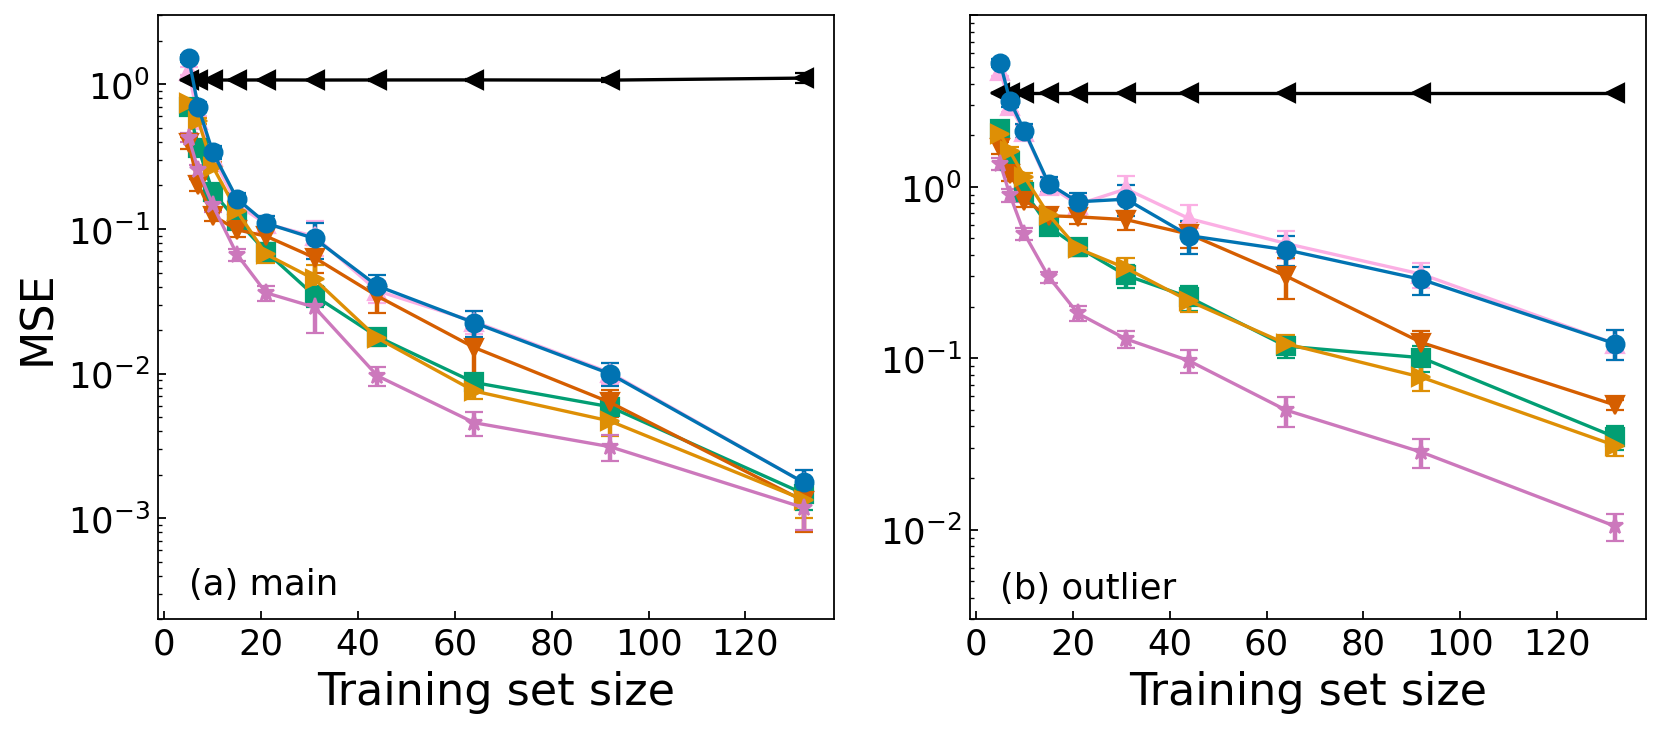

In [81]:
from matplotlib import gridspec

fig=plt.figure(figsize=(12, 5), dpi= 160, facecolor='w', edgecolor='k')
gs=gridspec.GridSpec(1,2)

specs={'linestyle' : '-', 'elinewidth' : 2, 'capsize' : 4, 'markersize' : 8}

# main data
ax0 = plt.subplot(gs[0])

ax0.errorbar(ve[0], ve[1], yerr=ve[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax0.errorbar(de[0], de[1], yerr=de[2],color=cmap[2],label='difference',marker='s',**specs)
ax0.errorbar(qe[0], qe[1], yerr=qe[2],color=cmap[3],label='quotient',marker='v',**specs)
ax0.errorbar(t[0], t[1], yerr=t[2],color='black',label='theory',marker='<',**specs)
ax0.errorbar(le[0], le[1], yerr=le[2],color=cmap[1],label='prior',marker='>',**specs)
ax0.errorbar(me[0], me[1], yerr=me[2],color=cmap[4],label='param',marker='*',**specs)
ax0.errorbar(ie[0], ie[1], yerr=ie[2],color=cmap[0],label='direct',marker='o',**specs)

ax0.set_yscale('log')
        
# outlier data
ax1 = plt.subplot(gs[1])

ax1.errorbar(voe[0], voe[1], yerr=voe[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax1.errorbar(doe[0], doe[1], yerr=doe[2],color=cmap[2],label='difference',marker='s',**specs)
ax1.errorbar(qoe[0], qoe[1], yerr=qoe[2],color=cmap[3],label='quotient',marker='v',**specs)
ax1.errorbar(to[0], to[1], yerr=to[2],color='black',label='theory',marker='<',**specs)
ax1.errorbar(loe[0], loe[1], yerr=loe[2],color=cmap[1],label='prior',marker='>',**specs)
ax1.errorbar(moe[0], moe[1], yerr=moe[2],color=cmap[4],label='param',marker='*',**specs)
ax1.errorbar(ioe[0], ioe[1], yerr=ioe[2],color=cmap[0],label='direct',marker='o',**specs)

ax1.set_yscale('log')
#ax1.get_yaxis().set_ticks([])

# adjustments
#plt.subplots_adjust(hspace=0.0, wspace=0.0)

ax0.tick_params(which='minor',axis="y",direction="in")
ax0.tick_params(which='major',axis="y",direction="in")
ax0.tick_params(axis="x",direction="in")

ax1.tick_params(which='minor',axis="y",direction="in")
ax1.tick_params(which='major',axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")

# Labels
ax0.set_xlabel('Training set size', fontsize=20)
ax1.set_xlabel('Training set size', fontsize=20)
ax0.set_ylabel('MSE', fontsize=20)

# Make all y axes the same size
ax0.set_ylim([2e-4,3])
ax1.set_ylim([3e-3,10])

# Increase tick mark label size for y
ax0.set_xticks([0,20,40,60,80,100,120])
ax1.set_xticks([0,20,40,60,80,100,120])
ax0.set_xticklabels([0,20,40,60,80,100,120],fontsize=16)
ax1.set_xticklabels([0,20,40,60,80,100,120],fontsize=16)

print(ax0.get_yticks())
ax0.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
print(ax1.get_yticks())
ax1.set_yticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)

# Add labels to each sub plot
ax0.text(5,.0003,'(a) main',fontsize=16)
ax1.text(5,.004,'(b) outlier',fontsize=16)


# Add color scheme??
# Let's do this separately in powerpoint.

plt.show()

# Need help on formating? See here: https://matplotlib.org/stable/api/axes_api.html


#plt.savefig('hetero.pdf',bbox_inches='tight')

## Single figures

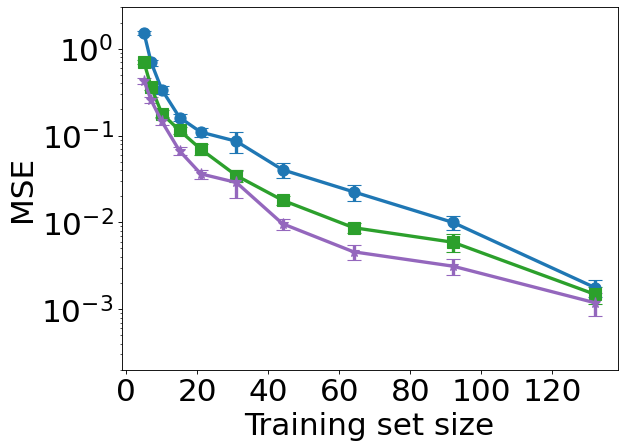

In [16]:
    plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    
    plt.errorbar(ie[0], ie[1], yerr=ie[2],color='C0',label='base',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3)
    #plt.errorbar(se[0], se[1], yerr=se[2],color='C1',label='stacked',linestyle='-',marker='^',elinewidth=3, capsize=6, markersize=10, lw=3,alpha=.5)
    plt.errorbar(de[0], de[1], yerr=de[2],color='C2',label='difference',linestyle='-',marker='s',elinewidth=3, capsize=6, markersize=10, lw=3)
    #plt.errorbar(pe[0], pe[1], yerr=pe[2],color='C3',label='product',linestyle='-',marker='v',elinewidth=3, capsize=6, markersize=10, lw=3)
    #plt.errorbar(te[0], te[1], yerr=te[2],color='black',label='theory',linestyle='-',marker='<',elinewidth=3, capsize=6, markersize=10, lw=3)
    plt.errorbar(me[0], me[1], yerr=me[2],color='C4',label='param',linestyle='-',marker='*',elinewidth=3, capsize=6, markersize=10, lw=3)
    #plt.errorbar(re[0], re[1], yerr=re[2],color='C8',label='prior',linestyle='-',marker='>',elinewidth=3, capsize=6, markersize=10, lw=3)
    
    plt.yscale('log')
    #plt.xscale('log')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=35)
    plt.xlabel('Training set size', fontsize=28)
    plt.ylabel('MSE', fontsize=28)
    
    plt.ylim([2e-4,3])
    
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    
    plt.savefig("direct.jpg")
    plt.show()

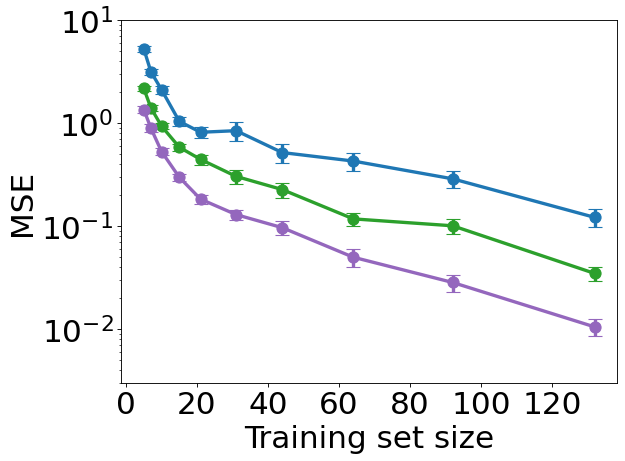

In [17]:
    plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    
    #plt.errorbar(soe[0], soe[1], yerr=soe[2],color='C1',label='stacked',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3,alpha=.5)
    #plt.errorbar(roe[0], roe[1], yerr=roe[2],color='C8',label='prior',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3,alpha=.5)
    #plt.errorbar(poe[0], poe[1], yerr=poe[2],color='C3',label='product',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3,alpha=.5)

    
    plt.errorbar(ioe[0], ioe[1], yerr=ioe[2],color='C0',label='base',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3)
    plt.errorbar(doe[0], doe[1], yerr=doe[2],color='C2',label='difference',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3)
    #plt.errorbar(toe[0], toe[1], yerr=toe[2],color='black',label='theory',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3)
    plt.errorbar(moe[0], moe[1], yerr=moe[2],color='C4',label='param',linestyle='-',marker='o', elinewidth=3, capsize=6, markersize=10, lw=3)
    
    
    plt.yscale('log')
    #plt.xscale('log')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=35)
    plt.xlabel('Training set size', fontsize=28)
    plt.ylabel('MSE', fontsize=28)
    
    plt.ylim([3e-3,10])
    
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    
    plt.show()

# Load additional data

## GPR with homoscedastic noise

In [35]:
# main data
io=np.loadtxt('../results/homo_direct.dat').transpose()
vo=np.loadtxt('../results/homo_latentvariable.dat').transpose()
do=np.loadtxt('../results/homo_difference.dat').transpose()
qo=np.loadtxt('../results/homo_quotient.dat').transpose()
lo=np.loadtxt('../results/homo_linearprior.dat').transpose()
fo=np.loadtxt('../results/homo_fixedprior.dat').transpose()
mo=np.loadtxt('../results/homo_parameterization.dat').transpose()

# outlier data
ioo=np.loadtxt('../results/homo_out_direct.dat').transpose()
voo=np.loadtxt('../results/homo_out_latentvariable.dat').transpose()
doo=np.loadtxt('../results/homo_out_difference.dat').transpose()
qoo=np.loadtxt('../results/homo_out_quotient.dat').transpose()
loo=np.loadtxt('../results/homo_out_linearprior.dat').transpose()
foo=np.loadtxt('../results/homo_out_fixedprior.dat').transpose()
moo=np.loadtxt('../results/homo_out_parameterization.dat').transpose()

# Random Forest

In [38]:
# main data
ir=np.loadtxt('../results/rf_direct_1000_None.dat').transpose()
vr=np.loadtxt('../results/rf_latentvariable_1000_None.dat').transpose()
dr=np.loadtxt('../results/rf_difference_1000_None.dat').transpose()
qr=np.loadtxt('../results/rf_quotient_1000_None.dat').transpose()

# outlier data
ior=np.loadtxt('../results/rf_direct_1000_None_out.dat').transpose()
vor=np.loadtxt('../results/rf_latentvariable_1000_None_out.dat').transpose()
dor=np.loadtxt('../results/rf_difference_1000_None_out.dat').transpose()
qor=np.loadtxt('../results/rf_quotient_1000_None_out.dat').transpose()

# Plot all data next together

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/4114163445.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/4114163445.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/4114163445.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
/var/folders/yy/jpwmpczd4095czq82njxsd7w001j15/T/ipykernel_35183/4114163445.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['$10^{-4}$','$10^

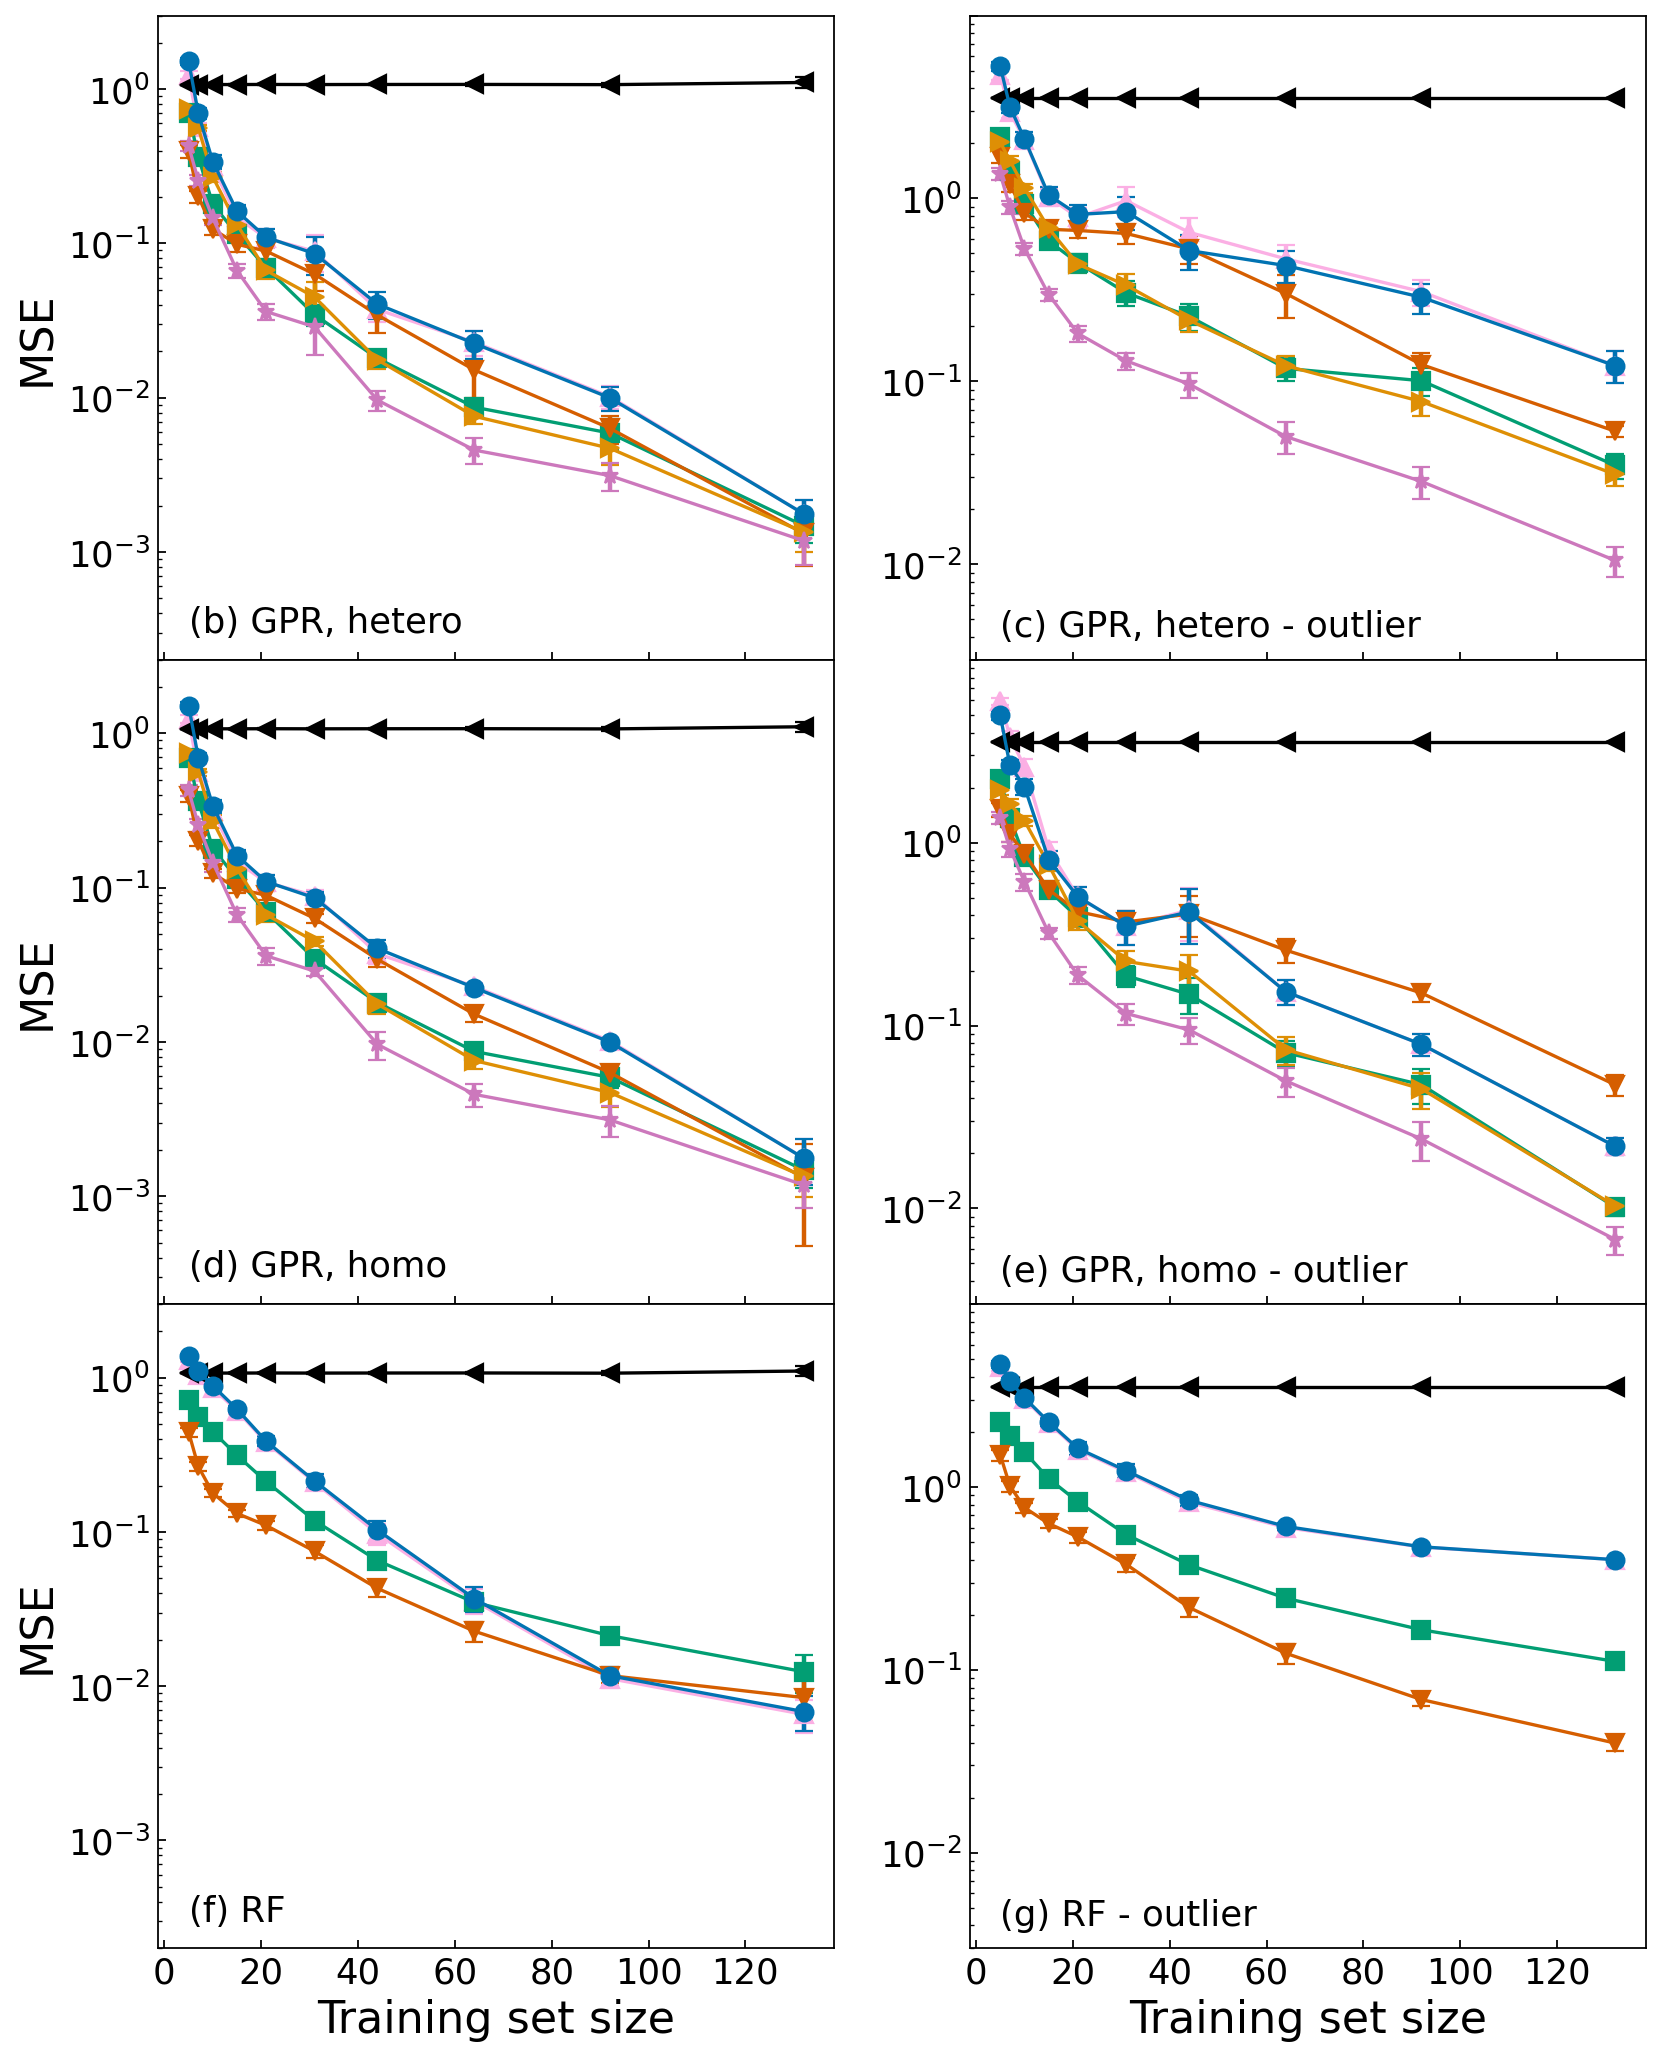

In [77]:
fig=plt.figure(figsize=(12, 16), dpi=160, facecolor='w', edgecolor='k')
gs=gridspec.GridSpec(3,2)

####### GPR with heteroscedastic noise #######

# main data
ax0 = plt.subplot(gs[0])

ax0.errorbar(ve[0], ve[1], yerr=ve[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax0.errorbar(de[0], de[1], yerr=de[2],color=cmap[2],label='difference',marker='s',**specs)
ax0.errorbar(qe[0], qe[1], yerr=qe[2],color=cmap[3],label='quotient',marker='v',**specs)
ax0.errorbar(t[0], t[1], yerr=t[2],color='black',label='theory',marker='<',**specs)
ax0.errorbar(le[0], le[1], yerr=le[2],color=cmap[1],label='prior',marker='>',**specs)
ax0.errorbar(me[0], me[1], yerr=me[2],color=cmap[4],label='param',marker='*',**specs)
ax0.errorbar(ie[0], ie[1], yerr=ie[2],color=cmap[0],label='direct',marker='o',**specs)

ax0.set_yscale('log')
        
# outlier data
ax1 = plt.subplot(gs[1])

ax1.errorbar(voe[0], voe[1], yerr=voe[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax1.errorbar(doe[0], doe[1], yerr=doe[2],color=cmap[2],label='difference',marker='s',**specs)
ax1.errorbar(qoe[0], qoe[1], yerr=qoe[2],color=cmap[3],label='quotient',marker='v',**specs)
ax1.errorbar(to[0], to[1], yerr=to[2],color='black',label='theory',marker='<',**specs)
ax1.errorbar(loe[0], loe[1], yerr=loe[2],color=cmap[1],label='prior',marker='>',**specs)
ax1.errorbar(moe[0], moe[1], yerr=moe[2],color=cmap[4],label='param',marker='*',**specs)
ax1.errorbar(ioe[0], ioe[1], yerr=ioe[2],color=cmap[0],label='direct',marker='o',**specs)

ax1.set_yscale('log')


####### GPR with homoscedastic noise #######

# main data
ax2 = plt.subplot(gs[2])

ax2.errorbar(vo[0], ve[1], yerr=vo[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax2.errorbar(do[0], de[1], yerr=do[2],color=cmap[2],label='difference',marker='s',**specs)
ax2.errorbar(qo[0], qe[1], yerr=qo[2],color=cmap[3],label='quotient',marker='v',**specs)
ax2.errorbar(t[0], t[1], yerr=t[2],color='black',label='theory',marker='<',**specs)
ax2.errorbar(lo[0], le[1], yerr=lo[2],color=cmap[1],label='prior',marker='>',**specs)
ax2.errorbar(mo[0], me[1], yerr=mo[2],color=cmap[4],label='param',marker='*',**specs)
ax2.errorbar(io[0], ie[1], yerr=io[2],color=cmap[0],label='direct',marker='o',**specs)

ax2.set_yscale('log')
        
# outlier data
ax3 = plt.subplot(gs[3])

ax3.errorbar(voo[0], voo[1], yerr=voo[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax3.errorbar(doo[0], doo[1], yerr=doo[2],color=cmap[2],label='difference',marker='s',**specs)
ax3.errorbar(qoo[0], qoo[1], yerr=qoo[2],color=cmap[3],label='quotient',marker='v',**specs)
ax3.errorbar(to[0], to[1], yerr=to[2],color='black',label='theory',marker='<',**specs)
ax3.errorbar(loo[0], loo[1], yerr=loo[2],color=cmap[1],label='prior',marker='>',**specs)
ax3.errorbar(moo[0], moo[1], yerr=moo[2],color=cmap[4],label='param',marker='*',**specs)
ax3.errorbar(ioo[0], ioo[1], yerr=ioo[2],color=cmap[0],label='direct',marker='o',**specs)

ax3.set_yscale('log')

####### random forest ####### (MISSING AUGMENTED DATA)

# main data
ax4 = plt.subplot(gs[4])

ax4.errorbar(vr[0], vr[1], yerr=vr[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax4.errorbar(dr[0], dr[1], yerr=dr[2],color=cmap[2],label='difference',marker='s',**specs)
ax4.errorbar(qr[0], qr[1], yerr=qr[2],color=cmap[3],label='quotient',marker='v',**specs)
ax4.errorbar(t[0], t[1], yerr=t[2],color='black',label='theory',marker='<',**specs)
ax4.errorbar(ir[0], ir[1], yerr=ir[2],color=cmap[0],label='direct',marker='o',**specs)

ax4.set_yscale('log')

# outlier data
ax5 = plt.subplot(gs[5])

ax5.errorbar(vor[0], vor[1], yerr=vor[2],color=cmap[6],label='latent variable',marker='^',**specs)
ax5.errorbar(dor[0], dor[1], yerr=dor[2],color=cmap[2],label='difference',marker='s',**specs)
ax5.errorbar(qor[0], qor[1], yerr=qor[2],color=cmap[3],label='quotient',marker='v',**specs)
ax5.errorbar(to[0], to[1], yerr=to[2],color='black',label='theory',marker='<',**specs)
ax5.errorbar(ior[0], ior[1], yerr=ior[2],color=cmap[0],label='direct',marker='o',**specs)

ax5.set_yscale('log')

# plot parameters

plt.subplots_adjust(hspace=.0)

ax0.tick_params(which='minor',axis="y",direction="in")
ax0.tick_params(which='major',axis="y",direction="in")
ax0.tick_params(axis="x",direction="in")

ax1.tick_params(which='minor',axis="y",direction="in")
ax1.tick_params(which='major',axis="y",direction="in")
ax1.tick_params(axis="x",direction="in")

ax2.tick_params(which='minor',axis="y",direction="in")
ax2.tick_params(which='major',axis="y",direction="in")
ax2.tick_params(axis="x",direction="in")

ax3.tick_params(which='minor',axis="y",direction="in")
ax3.tick_params(which='major',axis="y",direction="in")
ax3.tick_params(axis="x",direction="in")

ax4.tick_params(which='minor',axis="y",direction="in")
ax4.tick_params(which='major',axis="y",direction="in")
ax4.tick_params(axis="x",direction="in")

ax5.tick_params(which='minor',axis="y",direction="in")
ax5.tick_params(which='major',axis="y",direction="in")
ax5.tick_params(axis="x",direction="in")

# Labels
ax4.set_xlabel('Training set size', fontsize=20)
ax5.set_xlabel('Training set size', fontsize=20)
ax0.set_ylabel('MSE', fontsize=20)
ax2.set_ylabel('MSE', fontsize=20)
ax4.set_ylabel('MSE', fontsize=20)

# Make all y axes the same size
ax0.set_ylim([2e-4,3])
ax2.set_ylim([2e-4,3])
ax4.set_ylim([2e-4,3])

ax1.set_ylim([3e-3,10])
ax3.set_ylim([3e-3,10])
ax5.set_ylim([3e-3,10])

# Increase tick mark label size for xr
ax4.set_xticks([0,20,40,60,80,100,120])
ax5.set_xticks([0,20,40,60,80,100,120])
ax4.set_xticklabels([0,20,40,60,80,100,120],fontsize=16)
ax5.set_xticklabels([0,20,40,60,80,100,120],fontsize=16)

# Increase tick mark label size for y
print(ax0.get_yticks())
ax0.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
ax2.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
ax4.set_yticklabels(['$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
print(ax1.get_yticks())
ax1.set_yticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
ax3.set_yticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)
ax5.set_yticklabels(['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'],fontsize=16)

# Add labels to each sub plot
ax0.text(5,.0003,'(b) GPR, hetero',fontsize=16)
ax2.text(5,.0003,'(d) GPR, homo',fontsize=16)
ax4.text(5,.0003,'(f) RF',fontsize=16)
ax1.text(5,.004,'(c) GPR, hetero - outlier',fontsize=16)
ax3.text(5,.004,'(e) GPR, homo - outlier',fontsize=16)
ax5.text(5,.004,'(g) RF - outlier',fontsize=16)


plt.show()